## Student Habits vs Academic Performance


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load Dataset 

In [2]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### Reading Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.shape

(1000, 16)

In [6]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [7]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

## Let's Check Missing Value

In [9]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

### Insights
Only 'parental_education_level' column have 91 missing values

## Check Duplicates

In [13]:
df.duplicated().sum()

0

## Correlation of dataset

In [26]:
cor = df.corr(numeric_only=True)

In [27]:
cor

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


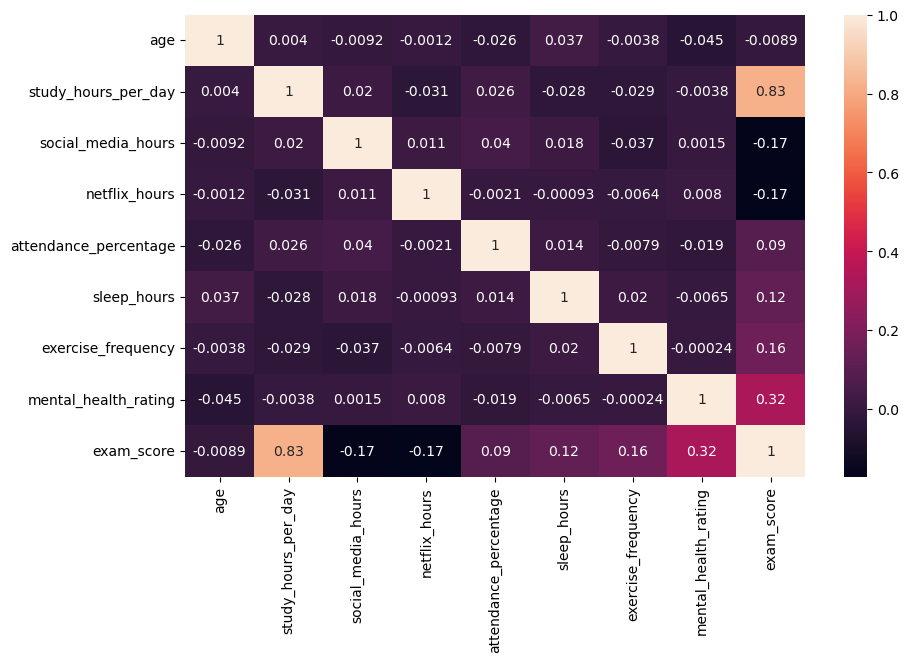

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)
plt.show()

## Insight
1. study_hour_per_day directly affects exam_score. 
2. mental_health_rating also directly affects the exam_score

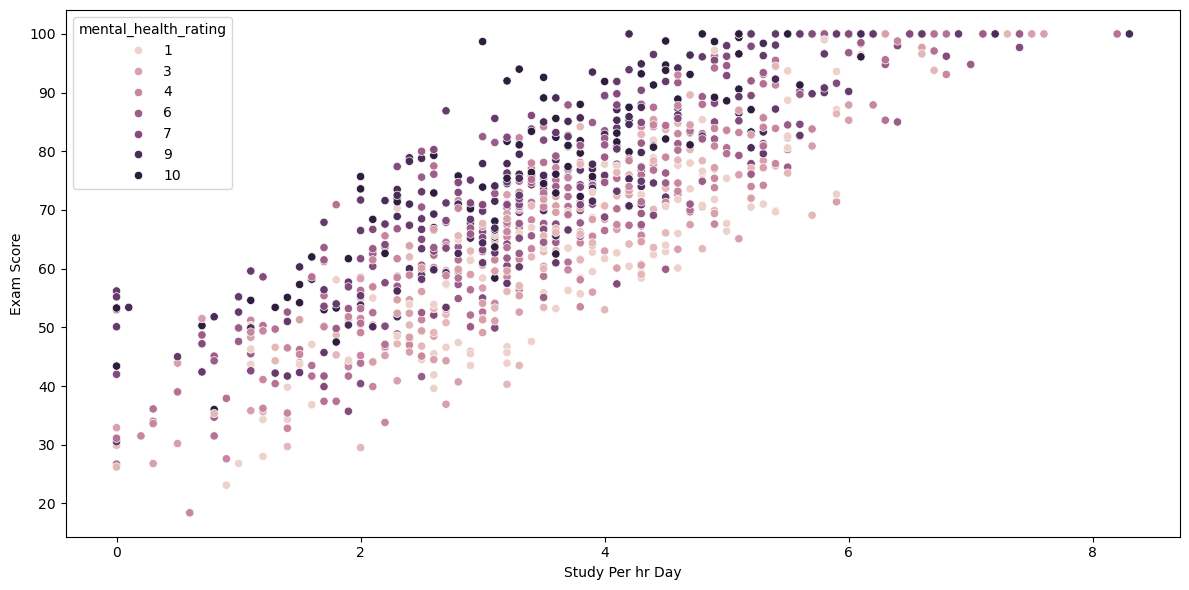

In [47]:
## Plotting scatter plot 
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x=df['study_hours_per_day'], y=df['exam_score'], hue=df['mental_health_rating'])
plt.xlabel("Study Per hr Day")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

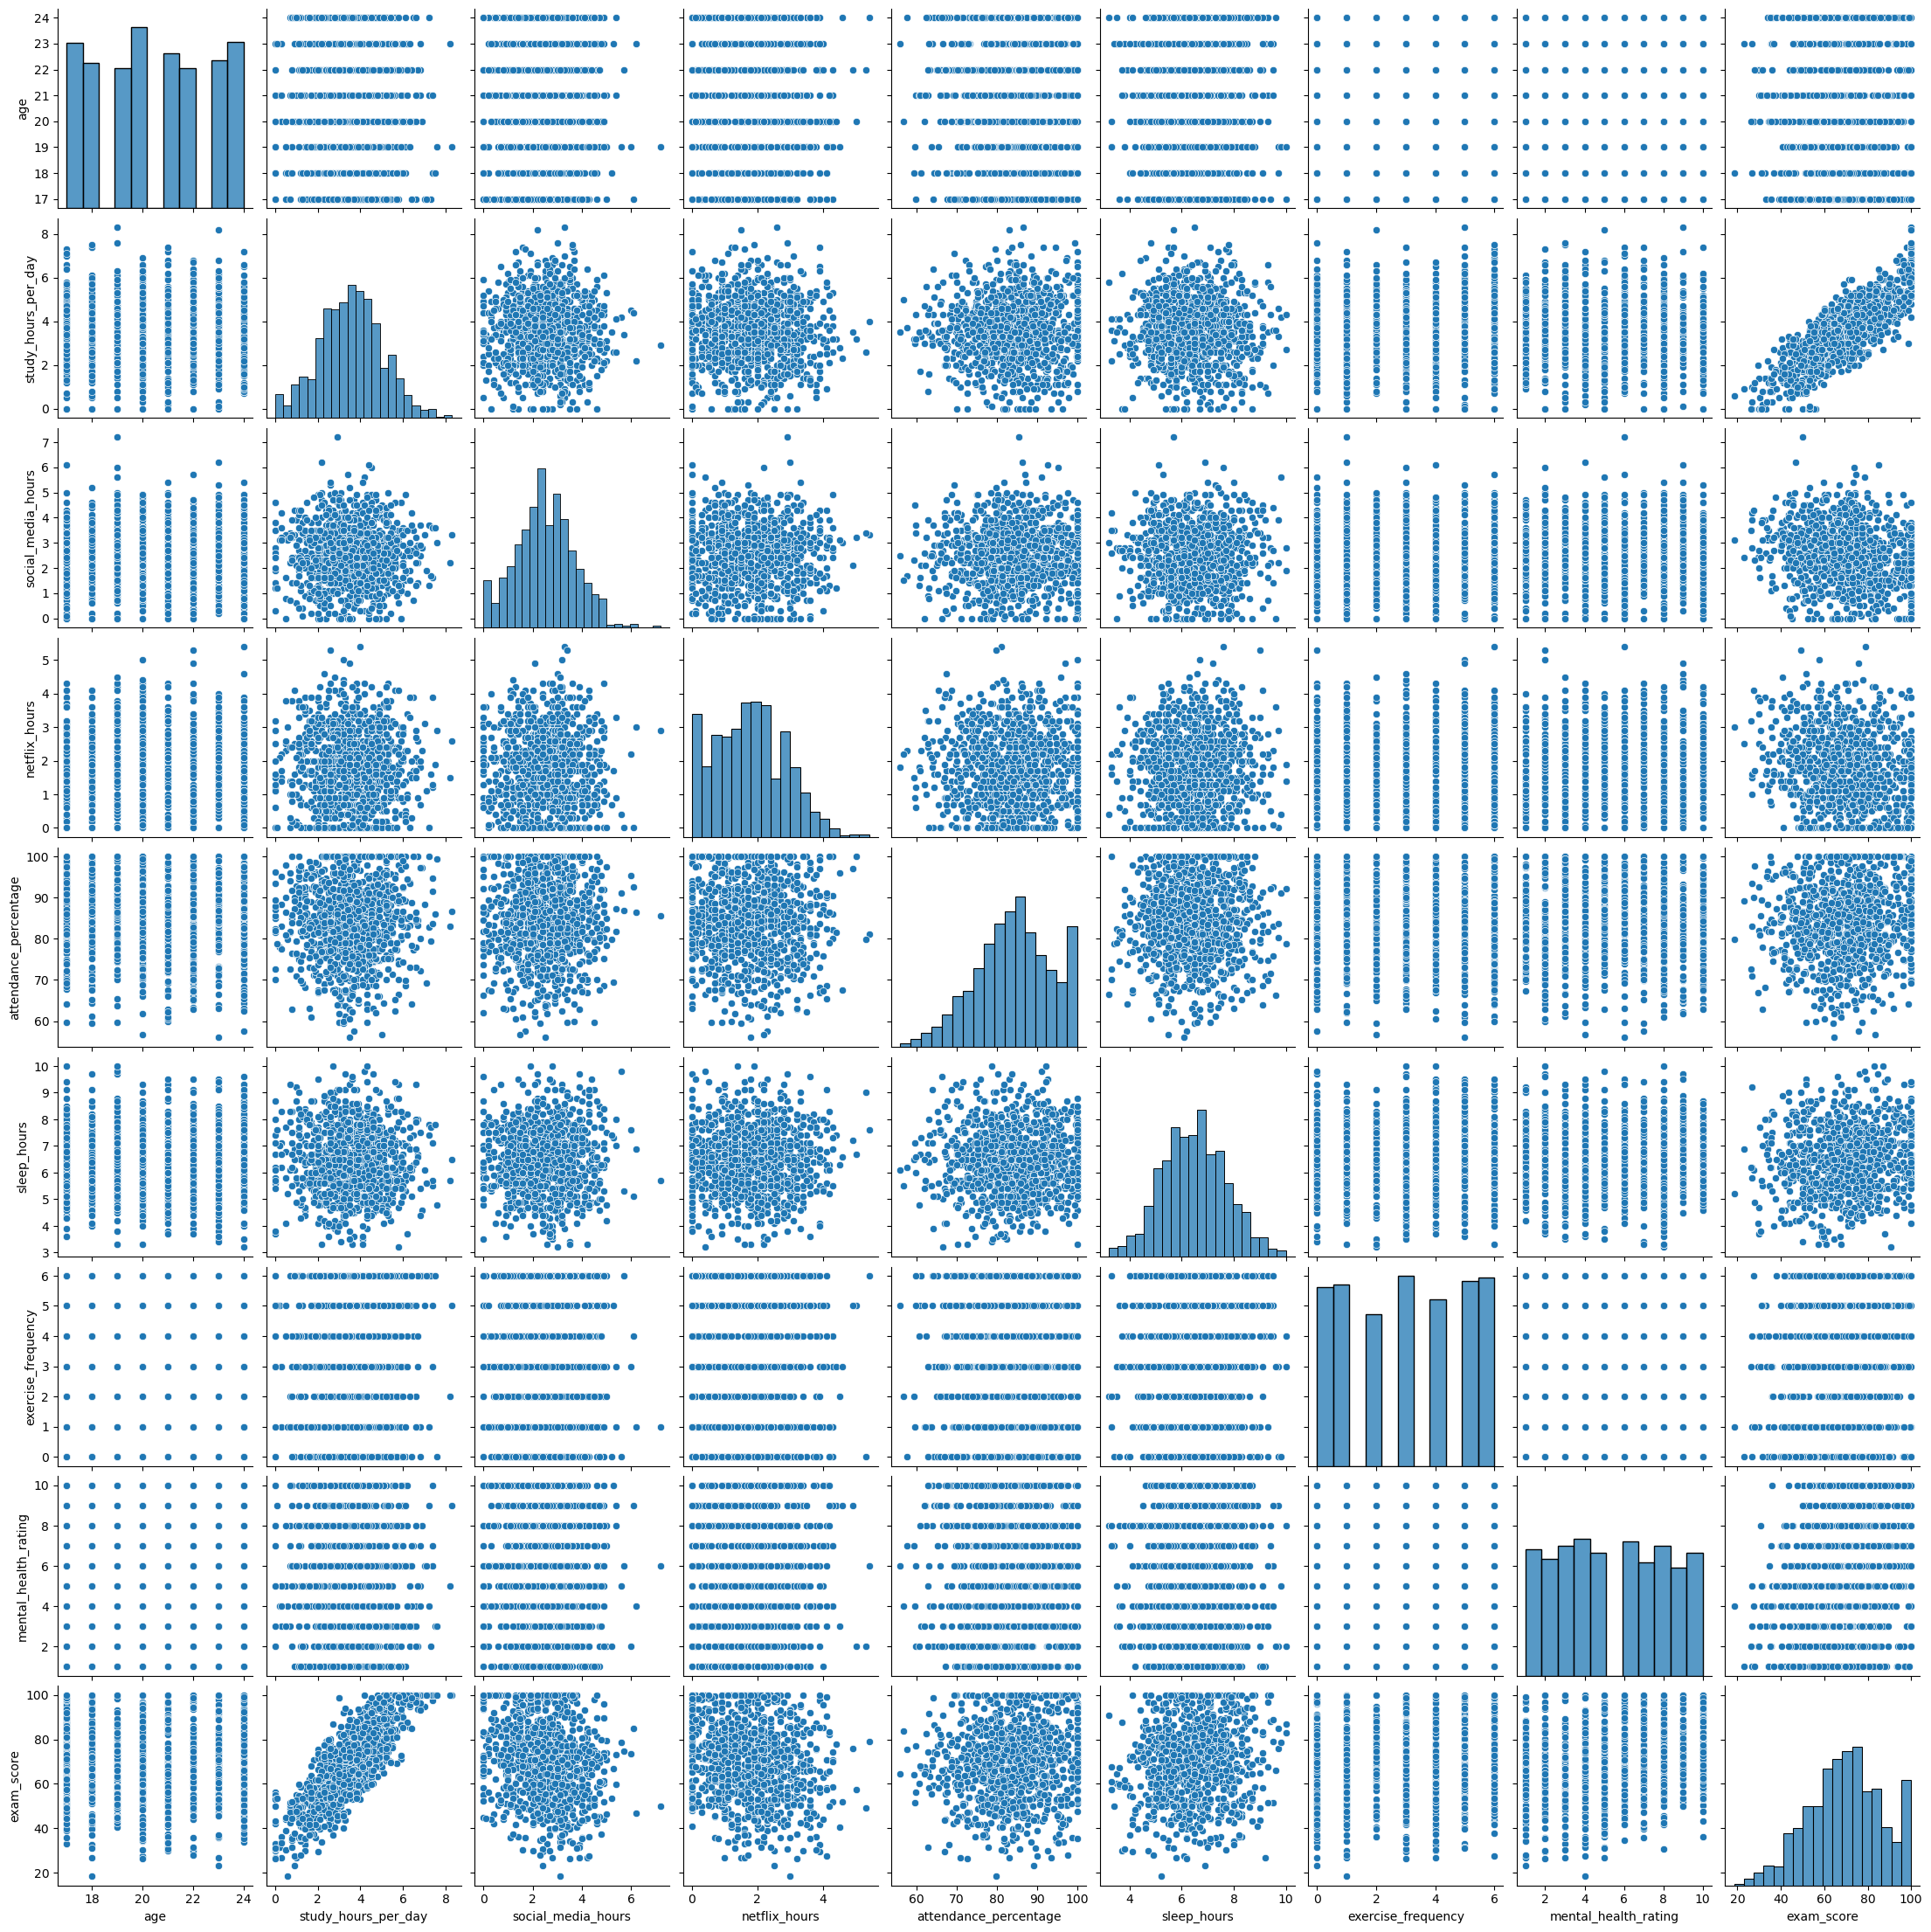

In [50]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.show()

## Data Manipulation

In [51]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [73]:
df['diet_quality'].unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

In [71]:
df['exercise_frequency'].unique()

array([6, 1, 4, 3, 2, 0, 5], dtype=int64)

In [72]:
df['exercise_frequency'].isnull().sum()

0

In [76]:
diet_exercise_exam_score = df.groupby(['diet_quality', 'exercise_frequency'])['exam_score'].count()

In [80]:
diet_exercise_exam_score

diet_quality  exercise_frequency
Fair          0                     58
              1                     77
              2                     53
              3                     70
              4                     59
              5                     60
              6                     60
Good          0                     56
              1                     50
              2                     48
              3                     51
              4                     53
              5                     57
              6                     63
Poor          0                     30
              1                     19
              2                     21
              3                     32
              4                     22
              5                     32
              6                     29
Name: exam_score, dtype: int64

In [75]:
df.groupby(['diet_quality', 'exercise_frequency'])['exam_score'].mean()

diet_quality  exercise_frequency
Fair          0                     64.568966
              1                     67.540260
              2                     70.377358
              3                     69.340000
              4                     71.008475
              5                     74.961667
              6                     76.013333
Good          0                     67.323214
              1                     65.316000
              2                     69.572917
              3                     68.864706
              4                     69.535849
              5                     70.750877
              6                     73.250794
Poor          0                     68.096667
              1                     60.063158
              2                     72.690476
              3                     65.503125
              4                     60.704545
              5                     71.959375
              6                     74.437931
N

In [84]:
diet_score = df.groupby(['diet_quality'])['exam_score'].mean()

In [85]:
diet_score

diet_quality
Fair    70.428833
Good    69.366402
Poor    68.127568
Name: exam_score, dtype: float64